# Importing libraries

In [38]:
# library for data science
import pandas as pd 

# library for faster arrays
import numpy as np

# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="white", color_codes=True)

# library for ML algorithm
from sklearn.linear_model import LogisticRegression as LGR

# library for metrics
from sklearn import metrics as mtc

# Importing the dataset

In [39]:
dataset = pd.read_csv("./datasets/iris.csv")

# confirm dataset has been read
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Visualise the dataset

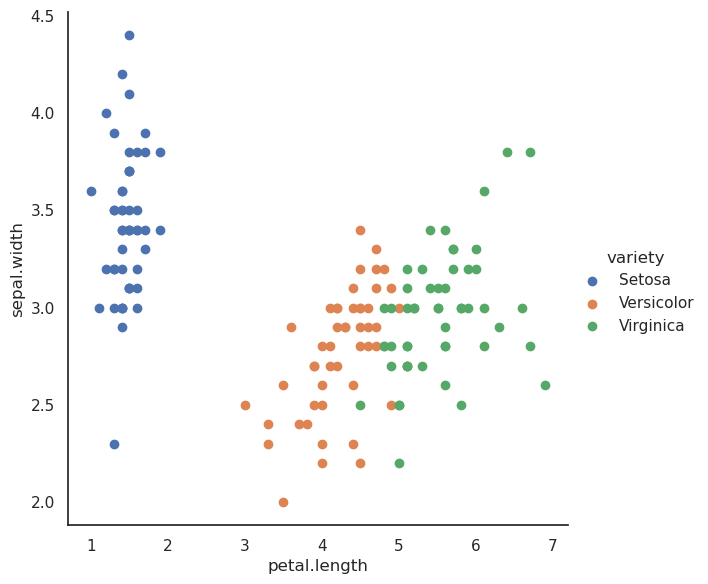

In [40]:
sb.FacetGrid(dataset, hue="variety", height=6).map(plt.scatter, "petal.length", "sepal.width").add_legend()

# Mapping categorical variables to numbers

In [41]:
# Map the different varieties to values
# Setosa -> 0
# Versicolor -> 1
# Virginica -> 2

variety_map = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

# replace the variety names with the newly mapped values
dataset["variety"] = dataset["variety"].map(variety_map)

# Preparing Inputs and Output values to train the model

In [42]:
input_values = dataset[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
output_values = dataset[['variety']].values

# Train the Logistic Regression model

In [43]:
# initialize the model using default values for simplicity
model = LGR()

# feed the input values and the correct output values
model.fit(input_values,output_values)

/home/s4lty/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s4lty/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Make predictions

In [44]:
# classify the expected answers
expected = output_values

# feed the model input values
predicted = model.predict(input_values)

# Check the performance of the model

In [45]:
# compare the predicted values with the expected values
print(mtc.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



- As we can see the overall accuracy of the model is 97%
- The model can easily classify the 1st variety, Setosa, with ease as it has a precision of 100%
- The model can classify the other two varieties, Versicolor and Virginica, with a precision of 98% and a 94%, which is quite good.

# Plot the data

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
variety,0.782561,-0.426658,0.949035,0.956547,1.000000


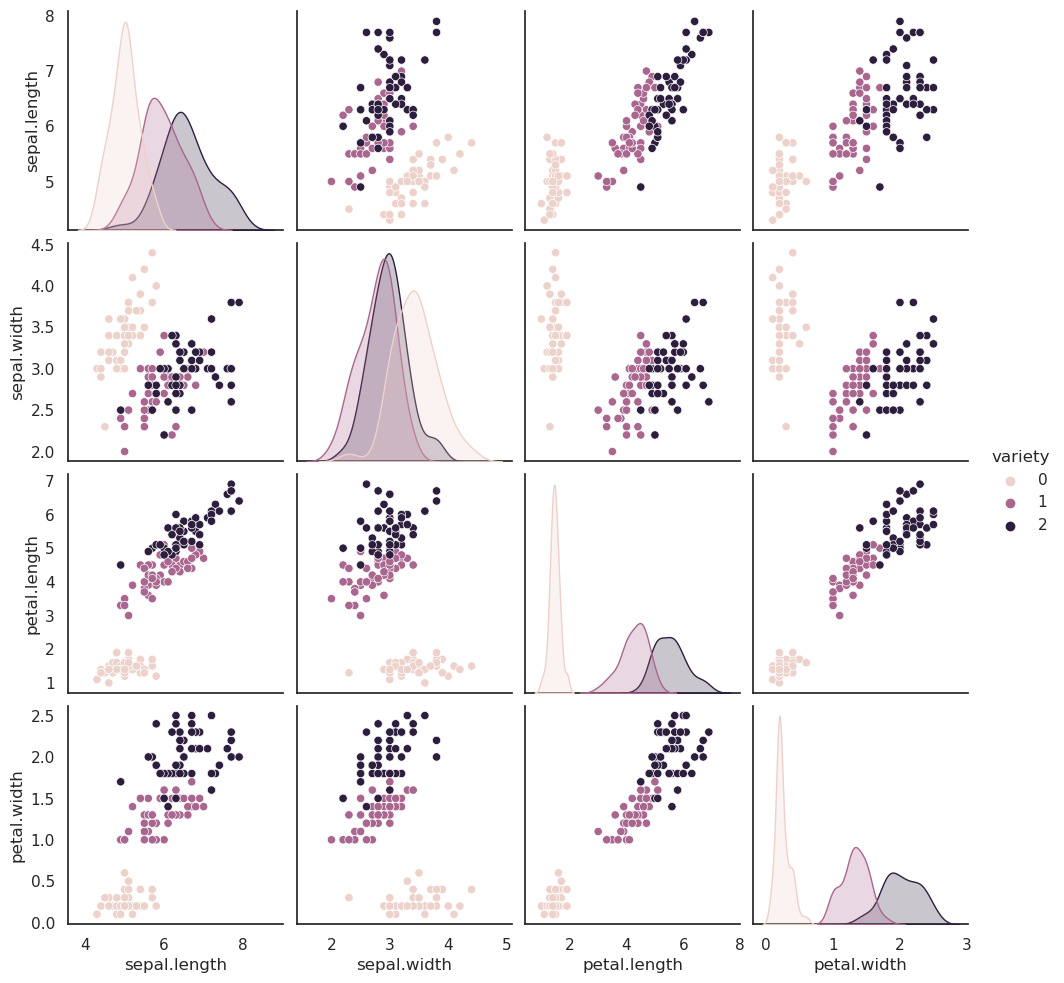

In [46]:
sb.pairplot(dataset,hue='variety')
dataset.corr()

- The plot shows the correlation between the different properties of the iris flower.
- This helps us understand how the model classified the varieties